### **Import Libraries**

In [23]:
#Import Libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### **EDA**

In [24]:
df = pd.read_excel('jatim.xlsx')

# Menampilkan 5 baris pertama data
print('Sample Data')
display(df.head())

# Menampilkan informasi tentang kolom data
print('\nInformasi Kolom\n')
display(df.info())

# Menampilkan statistik deskriptif data
print('\nStatistika Deskriptif')
display(df.describe())

# Mengecek apakah ada nilai yang hilang
print('\nMengecek Missing Values')
display(df.isnull().sum())

Sample Data


,KabKota,Distribusi_Penduduk,Indeks_Kedalaman_Kemiskinan_P1,Indeks_Keparahan_Kemiskinan_P2,PPM,Garis_Kemiskinan,Pengeluaran_per_Kapita,PDRB
0,0,1.44,1.35,0.23,13.80,327758,9184,0.66
1,0,2.34,0.99,0.16,9.32,362461,10199,0.84
2,0,1.80,1.38,0.28,10.96,381448,10042,0.76
3,0,2.69,0.66,0.09,6.71,391888,11162,1.62
4,0,3.01,1.33,0.30,8.71,355511,11001,1.52



Informasi Kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   KabKota                         38 non-null     int64  
 1   Distribusi_Penduduk             38 non-null     float64
 2   Indeks_Kedalaman_Kemiskinan_P1  38 non-null     float64
 3   Indeks_Keparahan_Kemiskinan_P2  38 non-null     float64
 4   PPM                             38 non-null     float64
 5   Garis_Kemiskinan                38 non-null     int64  
 6   Pengeluaran_per_Kapita          38 non-null     int64  
 7   PDRB                            38 non-null     float64
dtypes: float64(5), int64(3)
memory usage: 2.5 KB


None


Statistika Deskriptif


,KabKota,Distribusi_Penduduk,Indeks_Kedalaman_Kemiskinan_P1,Indeks_Keparahan_Kemiskinan_P2,PPM,Garis_Kemiskinan,Pengeluaran_per_Kapita,PDRB
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.236842,2.631053,1.502632,0.351842,10.325789,446972.631579,11837.973684,2.631842
std,0.430851,1.641064,0.735430,0.227689,4.270218,80226.343920,2237.915240,4.074330
min,0.000000,0.330000,0.400000,0.060000,3.790000,327758.000000,8944.000000,0.280000
25%,0.000000,1.710000,0.992500,0.220000,7.265000,392002.250000,10278.000000,0.785000
50%,0.000000,2.665000,1.345000,0.295000,9.630000,424584.500000,11564.000000,1.385000
75%,0.000000,3.230000,1.670000,0.407500,12.450000,509745.500000,12978.750000,3.200000
max,1.000000,7.020000,3.720000,1.160000,21.610000,652540.000000,18345.000000,24.010000



Mengecek Missing Values


KabKota                           0
Distribusi_Penduduk               0
Indeks_Kedalaman_Kemiskinan_P1    0
Indeks_Keparahan_Kemiskinan_P2    0
PPM                               0
Garis_Kemiskinan                  0
Pengeluaran_per_Kapita            0
PDRB                              0
dtype: int64

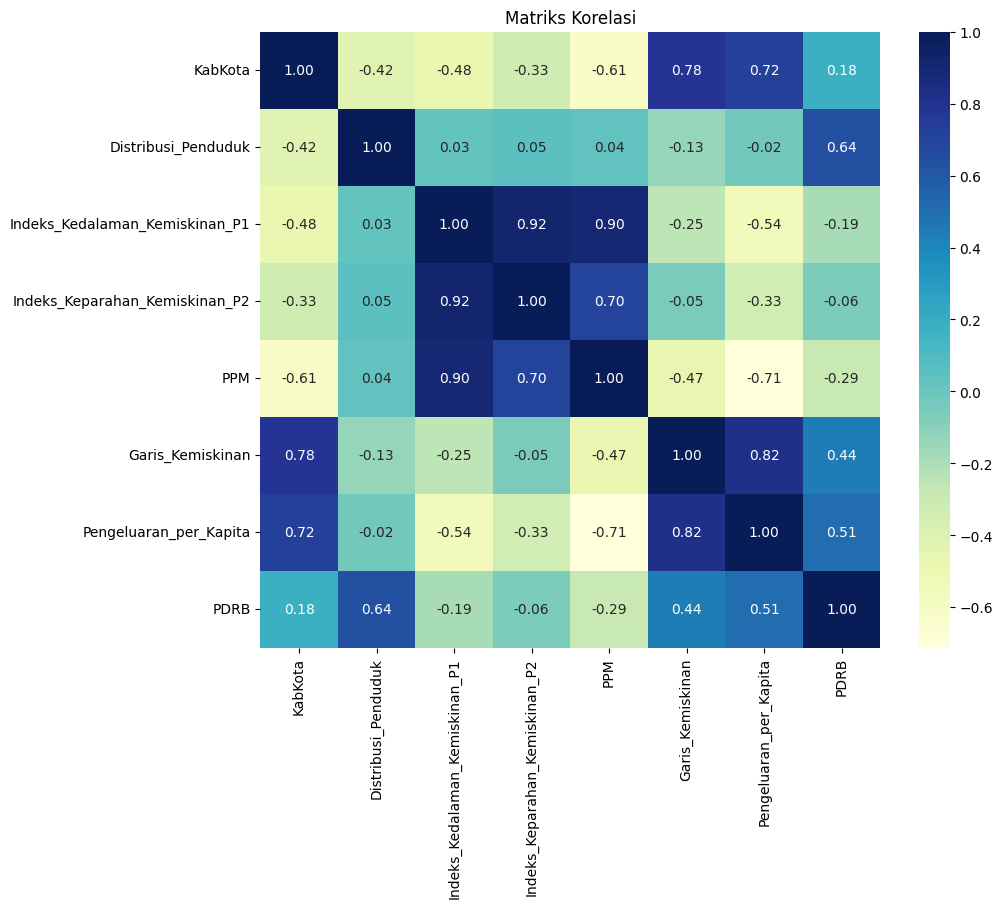

In [25]:
# Menghitung matriks korelasi
correlations = df.corr()

# Menggunakan Seaborn untuk membuat plot matriks korelasi berwarna
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

In [26]:
# Pastikan 'PDRB' adalah variabel target yang ingin Anda korelasikan
correlations = df.corr()

# Matriks korelasi antara fitur dan target (PDRB)
correlation_with_target = correlations['PDRB']

print(correlation_with_target)


KabKota                           0.179881
Distribusi_Penduduk               0.642336
Indeks_Kedalaman_Kemiskinan_P1   -0.186053
Indeks_Keparahan_Kemiskinan_P2   -0.060259
PPM                              -0.288724
Garis_Kemiskinan                  0.440923
Pengeluaran_per_Kapita            0.508394
PDRB                              1.000000
Name: PDRB, dtype: float64


### **Scaling**

In [27]:
# Kolom yang akan di-scale
columns_to_scale = ['Distribusi_Penduduk', 'Indeks_Kedalaman_Kemiskinan_P1', 
                    'Indeks_Keparahan_Kemiskinan_P2', 'PPM','Garis_Kemiskinan', 'Pengeluaran_per_Kapita']
# Mengambil kolom yang akan di-scale
data_to_scale = df[columns_to_scale]

# Normalization (min-max scaling)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Membuat DataFrame baru dengan data yang telah di-scale dan kolom yang tidak di-scale
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
result_df = pd.concat([scaled_df, df.drop(columns=columns_to_scale)], axis=1)

result_df.head()

,Distribusi_Penduduk,Indeks_Kedalaman_Kemiskinan_P1,Indeks_Keparahan_Kemiskinan_P2,PPM,Garis_Kemiskinan,Pengeluaran_per_Kapita,KabKota,PDRB
0,0.165919,0.286145,0.154545,0.561728,0.000000,0.025529,0,0.66
1,0.300448,0.177711,0.090909,0.310325,0.106850,0.133496,0,0.84
2,0.219731,0.295181,0.200000,0.402357,0.165311,0.116796,0,0.76
3,0.352765,0.078313,0.027273,0.163861,0.197456,0.235932,0,1.62
4,0.400598,0.280120,0.218182,0.276094,0.085451,0.218807,0,1.52


### **Splitting Data**

In [28]:
# Separate predictor and target variables

x = result_df[['KabKota', 'Distribusi_Penduduk', 'Indeks_Kedalaman_Kemiskinan_P1', 'Indeks_Keparahan_Kemiskinan_P2', 'PPM', 'Garis_Kemiskinan','Pengeluaran_per_Kapita']]
y = result_df[['PDRB']]


### **Regression Model**

In [29]:
#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   PDRB   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     11.48
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           5.41e-07
Time:                        15:54:17   Log-Likelihood:                -82.044
No. Observations:                  38   AIC:                             180.1
Df Residuals:                      30   BIC:                             193.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [30]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Melatih model regresi linier
reg = LinearRegression()
reg.fit(X_train, y_train)
# Memprediksi harga rumah pada data uji
y_pred = reg.predict(X_test)
# Menampilkan hasil evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Squared Error: 36.46233258730176
Mean Absolute Error: 2.9129138221824693
R2 Score: 0.35875571063764955
